<a href="https://colab.research.google.com/github/LuisFerRosas/IA_2/blob/master/Rede_RECURRENTES_Precio_Del_Petroleo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.python.keras import backend as K
K.clear_session()


In [0]:
import numpy as np
import pandas as pd

dataset_train = pd.read_excel('dataset/petroleoPrecio.xlsx')

print(dataset_train.head())

training_set = dataset_train.iloc[:, 2:3].values



        Data  Último  Abertura  Máxima  Mínima   Vol.  Var%
0 2019-12-01   66.00     60.73   68.99   60.30  4,34M  0.06
1 2019-11-01   62.43     59.45   64.60   59.40  4,79M  0.04
2 2019-10-01   60.23     59.38   62.34   56.15  5,46M -0.01
3 2019-09-01   60.78     58.80   71.95   57.23  5,51M  0.01
4 2019-08-01   60.43     64.09   64.54   55.88  5,98M -0.07


In [0]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train, y_train = [], []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i - 60: i, 0])
    y_train.append(training_set_scaled[i])

X_train, y_train = np.array(X_train), np.array(y_train)

print(f'Forma de x: {X_train.shape}')
print(f'Forma de y: {y_train.shape}')

Forma de x: (168, 60)
Forma de y: (168, 1)


In [0]:
y_train

array([[0.4215767 ],
       [0.55077354],
       [0.62417709],
       [0.69149111],
       [0.71329822],
       [0.770079  ],
       [0.74703752],
       [0.73370639],
       [0.73025016],
       [0.74489796],
       [0.7198815 ],
       [0.75773535],
       [0.74621461],
       [0.74168861],
       [0.73617512],
       [0.78242265],
       [0.73148453],
       [0.68285056],
       [0.66844964],
       [0.68219223],
       [0.75074062],
       [0.75691244],
       [0.79698815],
       [0.7618499 ],
       [0.75740619],
       [0.73708032],
       [0.76876234],
       [0.78818302],
       [0.7034233 ],
       [0.64746544],
       [0.68112245],
       [0.82587228],
       [0.85599078],
       [0.85648453],
       [0.76020408],
       [0.73592824],
       [0.75567808],
       [0.74201777],
       [0.68367347],
       [0.78941738],
       [0.80710994],
       [0.76431863],
       [0.80768598],
       [0.88199473],
       [0.81212969],
       [0.76514154],
       [0.67552666],
       [0.624

In [0]:
#Armando, probando y analizando resultados del modelo

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

regresor = Sequential()
regresor.add(LSTM(50,return_sequences = True, input_shape = (X_train.shape[1], 1)))

regresor.add(Dropout(.2))
regresor.add(LSTM(50, return_sequences = True))
regresor.add(Dropout(.2))
regresor.add(LSTM(50, return_sequences = False))
regresor.add(Dense(1))
regresor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
regresor.fit(X_train, y_train, epochs = 300, batch_size = 32)

Epoch 1/300
168/168 [==============================] - 2s 10ms/step - loss: 0.1157 - accuracy: 0.0060
Epoch 2/300
168/168 [==============================] - 1s 3ms/step - loss: 0.0691 - accuracy: 0.0119
Epoch 3/300
168/168 [==============================] - 1s 3ms/step - loss: 0.0487 - accuracy: 0.0060
Epoch 4/300
168/168 [==============================] - 1s 3ms/step - loss: 0.0427 - accuracy: 0.0060
Epoch 5/300
168/168 [==============================] - 1s 3ms/step - loss: 0.0318 - accuracy: 0.0060
Epoch 6/300
168/168 [==============================] - 1s 3ms/step - loss: 0.0291 - accuracy: 0.0060
Epoch 7/300
168/168 [==============================] - 1s 3ms/step - loss: 0.0281 - accuracy: 0.0060
Epoch 8/300
168/168 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.0060
Epoch 9/300
168/168 [==============================] - 0s 2ms/step - loss: 0.0250 - accuracy: 0.0060
Epoch 10/300
168/168 [==============================] - 0s 2ms/step - loss: 0.0240 - accur

168/168 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.0119
Epoch 81/300
168/168 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 0.0119
Epoch 82/300
168/168 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 0.0119
Epoch 83/300
168/168 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 0.0119
Epoch 84/300
168/168 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.0119
Epoch 85/300
168/168 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 0.0119
Epoch 86/300
168/168 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 0.0119
Epoch 87/300
168/168 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.0119
Epoch 88/300
168/168 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 0.0119
Epoch 89/300
168/168 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 

168/168 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.0119
Epoch 160/300
168/168 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 0.0119
Epoch 161/300
168/168 [==============================] - 1s 4ms/step - loss: 0.0054 - accuracy: 0.0119
Epoch 162/300
168/168 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.0119
Epoch 163/300
168/168 [==============================] - 1s 4ms/step - loss: 0.0040 - accuracy: 0.0119
Epoch 164/300
168/168 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 0.0119
Epoch 165/300
168/168 [==============================] - 1s 3ms/step - loss: 0.0042 - accuracy: 0.0119
Epoch 166/300
168/168 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 0.0119
Epoch 167/300
168/168 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 0.0119
Epoch 168/300
168/168 [==============================] - 0s 3ms/step - loss: 0.0045 - a

168/168 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.0119
Epoch 239/300
168/168 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 0.0119
Epoch 240/300
168/168 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.0119
Epoch 241/300
168/168 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.0119
Epoch 242/300
168/168 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.0119
Epoch 243/300
168/168 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.0119
Epoch 244/300
168/168 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.0119
Epoch 245/300
168/168 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.0119
Epoch 246/300
168/168 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.0119
Epoch 247/300
168/168 [==============================] - 0s 2ms/step - loss: 0.0027 - a

In [0]:
#Probar
dataset_test = pd.read_excel('dataset/petroleoPrecio.xlsx')
real_stock_val = dataset_test.iloc[:,1:2].values
dataset_total = pd.concat((dataset_train['Abertura'], dataset_test['Abertura']), axis=0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i - 60: i])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_prices = regresor.predict(X_test)

In [0]:
p=sc.inverse_transform(predicted_stock_prices)
p

array([[ 26.025024],
       [ 41.52792 ],
       [ 57.017826],
       [ 64.06051 ],
       [ 65.59475 ],
       [ 68.78283 ],
       [ 71.91124 ],
       [ 71.836586],
       [ 77.61352 ],
       [ 78.8919  ],
       [ 78.0609  ],
       [ 74.18189 ],
       [ 67.818886],
       [ 67.702515],
       [ 78.1865  ],
       [ 88.5259  ],
       [ 87.02869 ],
       [ 82.87423 ],
       [ 83.95751 ],
       [ 83.76285 ],
       [ 81.240425],
       [ 76.60718 ],
       [ 71.61043 ],
       [ 72.35705 ],
       [ 71.259865],
       [ 67.87015 ],
       [ 65.092995],
       [ 61.03661 ],
       [ 56.586937],
       [ 54.655624],
       [ 51.75661 ],
       [ 52.303257],
       [ 53.993744],
       [ 56.41876 ],
       [ 59.68041 ],
       [ 59.960648],
       [ 60.34723 ],
       [ 56.016693],
       [ 51.47435 ],
       [ 50.813614],
       [ 49.325256],
       [ 46.16939 ],
       [ 48.951927],
       [ 50.787273],
       [ 49.08181 ],
       [ 42.59142 ],
       [ 36.179256],
       [ 32.2

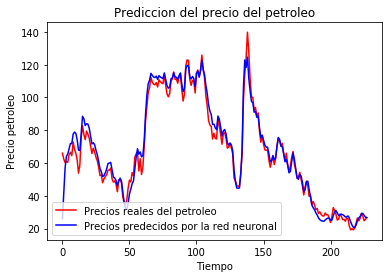

In [0]:

import matplotlib.pyplot as plt

plt.plot(real_stock_val, color = 'red', label = 'Precios reales del petroleo')
plt.plot(p, color = 'blue', label = 'Precios predecidos por la red neuronal')
plt.title('Prediccion del precio del petroleo')
plt.xlabel('Tiempo')
plt.ylabel('Precio petroleo')
plt.legend()
plt.show()


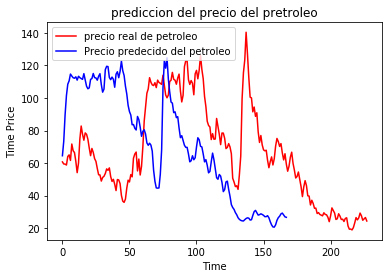

In [0]:
# Gettubg the real stock price 2012 - 2016
# Importing the training set
real_stock_price_train = pd.read_excel('dataset/petroleoPrecio.xlsx')
real_stock_price_train = real_stock_price_train.iloc[:,2:3].values

# Getting the predicted stock price of 2012 - 2016
predicted_stock_price_train = regresor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

# visualising the results
plt.plot(real_stock_price_train, color = 'red', label = 'precio real de petroleo')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Precio predecido del petroleo')
plt.title('prediccion del precio del pretroleo')
plt.xlabel('Time')
plt.ylabel('Time Price')
plt.legend()
plt.show()


Epoch 1/200
167/167 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.0000e+00
Epoch 2/200
167/167 [==============================] - 0s 60us/step - loss: 0.0513 - accuracy: 0.0000e+00
Epoch 3/200
167/167 [==============================] - 0s 48us/step - loss: 0.0505 - accuracy: 0.0000e+00
Epoch 4/200
167/167 [==============================] - 0s 54us/step - loss: 0.0499 - accuracy: 0.0000e+00
Epoch 5/200
167/167 [==============================] - 0s 54us/step - loss: 0.0495 - accuracy: 0.0000e+00
Epoch 6/200
167/167 [==============================] - 0s 48us/step - loss: 0.0492 - accuracy: 0.0000e+00
Epoch 7/200
167/167 [==============================] - 0s 54us/step - loss: 0.0489 - accuracy: 0.0000e+00
Epoch 8/200
167/167 [==============================] - 0s 48us/step - loss: 0.0487 - accuracy: 0.0000e+00
Epoch 9/200
167/167 [==============================] - 0s 60us/step - loss: 0.0484 - accuracy: 0.0000e+00
Epoch 10/200
167/167 [=========================

167/167 [==============================] - 0s 72us/step - loss: 0.0360 - accuracy: 0.0060
Epoch 79/200
167/167 [==============================] - 0s 66us/step - loss: 0.0358 - accuracy: 0.0060
Epoch 80/200
167/167 [==============================] - 0s 66us/step - loss: 0.0356 - accuracy: 0.0060
Epoch 81/200
167/167 [==============================] - 0s 66us/step - loss: 0.0355 - accuracy: 0.0060
Epoch 82/200
167/167 [==============================] - 0s 78us/step - loss: 0.0353 - accuracy: 0.0060
Epoch 83/200
167/167 [==============================] - 0s 66us/step - loss: 0.0351 - accuracy: 0.0060
Epoch 84/200
167/167 [==============================] - 0s 72us/step - loss: 0.0350 - accuracy: 0.0060
Epoch 85/200
167/167 [==============================] - 0s 66us/step - loss: 0.0347 - accuracy: 0.0060
Epoch 86/200
167/167 [==============================] - 0s 54us/step - loss: 0.0346 - accuracy: 0.0060
Epoch 87/200
167/167 [==============================] - 0s 60us/step - loss: 0.0344 - 

167/167 [==============================] - 0s 78us/step - loss: 0.0219 - accuracy: 0.0060
Epoch 158/200
167/167 [==============================] - 0s 84us/step - loss: 0.0217 - accuracy: 0.0060
Epoch 159/200
167/167 [==============================] - 0s 78us/step - loss: 0.0215 - accuracy: 0.0060
Epoch 160/200
167/167 [==============================] - 0s 78us/step - loss: 0.0213 - accuracy: 0.0060
Epoch 161/200
167/167 [==============================] - 0s 96us/step - loss: 0.0211 - accuracy: 0.0060
Epoch 162/200
167/167 [==============================] - 0s 90us/step - loss: 0.0210 - accuracy: 0.0060
Epoch 163/200
167/167 [==============================] - 0s 78us/step - loss: 0.0208 - accuracy: 0.0060
Epoch 164/200
167/167 [==============================] - 0s 84us/step - loss: 0.0206 - accuracy: 0.0060
Epoch 165/200
167/167 [==============================] - 0s 84us/step - loss: 0.0204 - accuracy: 0.0060
Epoch 166/200
167/167 [==============================] - 0s 78us/step - loss: 

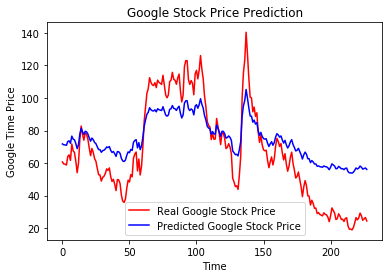

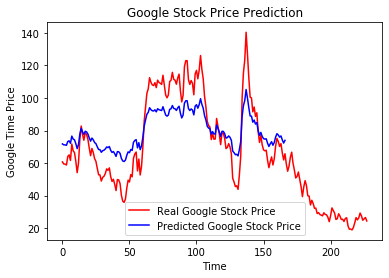

In [0]:
# Recurrent Neural Network
# Part 1 - Data preprocessing

# CS 229 Stanford 
# http://cs229.stanford.edu/proj2012/BernalFokPidaparthi-FinancialMarketTimeSeriesPredictionwithRecurrentNeural.pdf
# train LSTM on five years of Google 
# Supervised Deep Learning

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
training_set = pd.read_excel('dataset/petroleoPrecio.xlsx')

# input/ouputs of recurrent neural (input != date, stock price)
# but stock price at time t for input, and stock price t+1 for the output
# create a set only with the "Open" Google stock price, extract that column
# two-dimensional numpy array
training_set = training_set.iloc[:,2:3].values

# Feature Scaling + Normalization, since LSTM Several Sigmoid Activation function
# Sigmoid 0 and 1, as is the case in Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler() # default is 0,1
# Fitting to training_set, scale training set, 
# transform we'll apply normalizationjust need min and max for normalization
training_set = sc.fit_transform(training_set)

# Getting the inputs and the outputs, y_train is output, x_train is the input
X_train = training_set[0:167]
y_train = training_set[1:168]

# Reshaping inputs, input has a certain format (2D array, features)
# Changing the format of X_train into a 3D array, with a timestep
# Keras Documentation - why reshape? - 3D tensor with shape (batch_size, timesteps)
# time steps different between output and input time, input_dim dimension of input feature
X_train = np.reshape(X_train, (167, 1, 1))

# Part 2 - Building the RNN

# Importing the keras libs and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
# predicting a continuous outcome, regression model
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
# use the mean square error
# regression won't be binary cross entropy, MSE for regression
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

# Fitting the RNN to the Trainign set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
test_set =  pd.read_excel('dataset/petroleoPrecio.xlsx')
real_stock_price = test_set.iloc[:,2:3].values

# Getting the predicted stock price of 2017
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (228, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()

# Gettubg the real stock price 2012 - 2016
# Importing the training set
real_stock_price_train = pd.read_excel('dataset/petroleoPrecio.xlsx')
real_stock_price_train = real_stock_price_train.iloc[:,2:3].values

# Getting the predicted stock price of 2012 - 2016
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

# visualising the results
plt.plot(real_stock_price_train, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()

# Part 4 - Evaluating the RNN
# Evaluate of the RNN - learning to evaluate regression models
# Root Mean Square Error (RMSE)

import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
